<a href="https://colab.research.google.com/github/UnplugCharger/Week-13/blob/master/Week_13_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement


## Question

Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

## Specific Question

Do customer segmentation using Unsupervised Machine learning model in R 
The Algorithms to be used are K-means , DBSCAN and Hierarchical Clustering 


## Metrics of Success
Perform clusteing on the data using K-means , DBSCAN  and challenge the solution Using Hierararchical Clustering

# Data Sourcing

The data used in this analysis was obtained from http://bit.ly/EcommerceCustomersDataset

The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.

1. "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another. 

2. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
3. The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
4. The value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.
5. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
6. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
7. The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the

## Libraries

In [46]:
install.packages("dbscan", dependencies = TRUE)
library("dbscan")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘gdata’, ‘caTools’, ‘modeltools’, ‘DEoptimR’, ‘gridExtra’, ‘TTR’, ‘gplots’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’, ‘viridis’, ‘xts’, ‘quantmod’, ‘zoo’, ‘abind’, ‘ROCR’, ‘fpc’, ‘microbenchmark’, ‘dendextend’, ‘igraph’, ‘DMwR’




In [32]:
install.packages("psych",dependencies=TRUE)
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependencies ‘graph’, ‘Rgraphviz’ are not available”
also installing the dependencies ‘tmvnsim’, ‘pbivnorm’, ‘numDeriv’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘mnormt’, ‘psychTools’, ‘GPArotation’, ‘lavaan’, ‘lme4’, ‘Rcsdp’




In [36]:
install.packages("plyr")
library(plyr)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




In [39]:
install.packages("ggcorrplot")
library(ggcorrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape2’


Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha




In [45]:
install.packages("caret")
library(dplyr)
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’


Loading required package: lattice



# Check the Data

In [1]:
engaged_shopers <- read.csv("online_shoppers_intention.csv", header = TRUE)
head(engaged_shopers)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [2]:
dim(engaged_shopers)

[1] 12330    18

our dataset has 12330 rows and  18 columns 

In [3]:
summary(engaged_shopers)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

In [4]:
str(engaged_shopers)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

In [5]:
names(engaged_shopers)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

In [6]:
### Unique values per column
# 
lapply(engaged_shopers, function(x) length(table(x)))

$Administrative
[1] 27

$Administrative_Duration
[1] 3336

$Informational
[1] 17

$Informational_Duration
[1] 1259

$ProductRelated
[1] 311

$ProductRelated_Duration
[1] 9552

$BounceRates
[1] 1872

$ExitRates
[1] 4777

$PageValues
[1] 2704

$SpecialDay
[1] 6

$Month
[1] 10

$OperatingSystems
[1] 8

$Browser
[1] 13

$Region
[1] 9

$TrafficType
[1] 20

$VisitorType
[1] 3

$Weekend
[1] 2

$Revenue
[1] 2

We have several variables that are catergorical but have the int datatype .... we should change them to factors

# Perform Data Cleaning

## Missing Values

In [7]:
#Missing Values totall

sum(is.na(engaged_shopers))

[1] 112

In [8]:
# Missing values in each column
colSums(is.na(engaged_shopers))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

We have a really big dataset so 112 values could be dropped and we will still have a rich dataset

In [9]:
# Drop missing rows because they are few
engaged_shopers<- na.omit(engaged_shopers)

In [10]:
# Confirm if dataset missing values are gone
colSums(is.na(engaged_shopers))

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

## Checking for Duplicated data

In [11]:
anyDuplicated(engaged_shopers)

[1] 159

We will drop these values too

In [12]:
# Dropping duplicates
engaged_shopers<-engaged_shopers[!duplicated(engaged_shopers), ]

In [13]:
anyDuplicated(engaged_shopers)

[1] 0

## Checking for Outliers

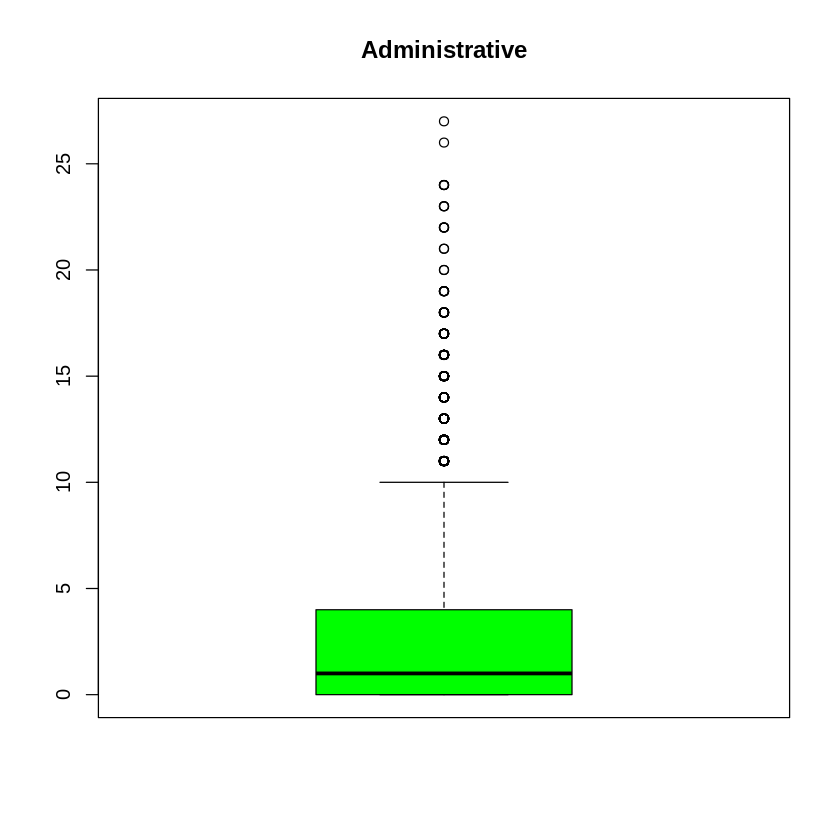

In [15]:
boxplot(engaged_shopers$Administrative,col='green', main="Administrative")

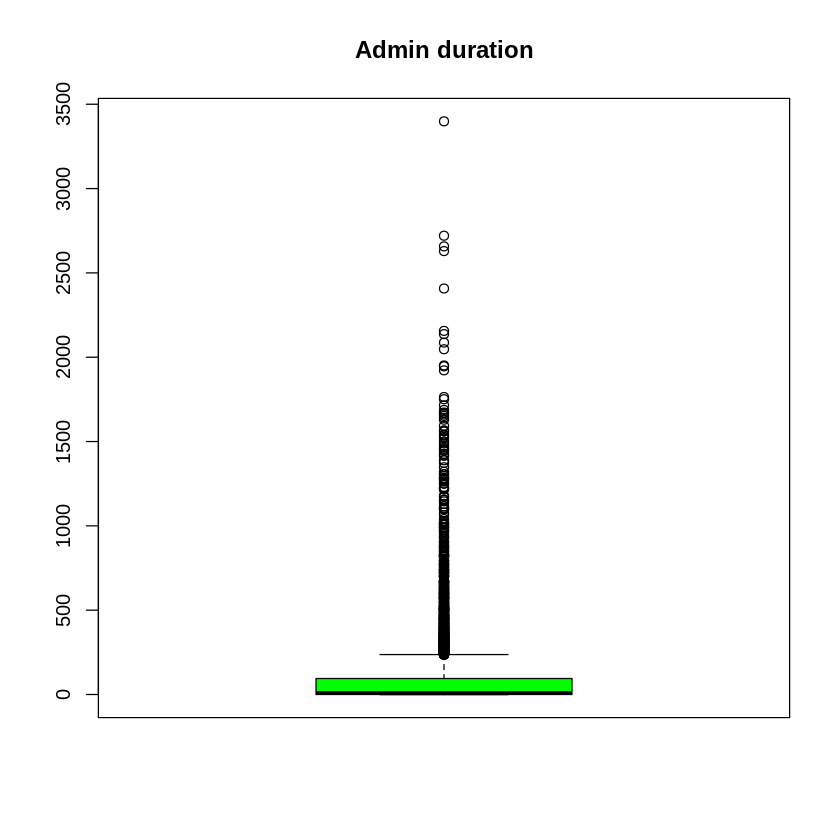

In [18]:
boxplot((engaged_shopers$`Administrative_Duration`), col='green', main="Admin duration")

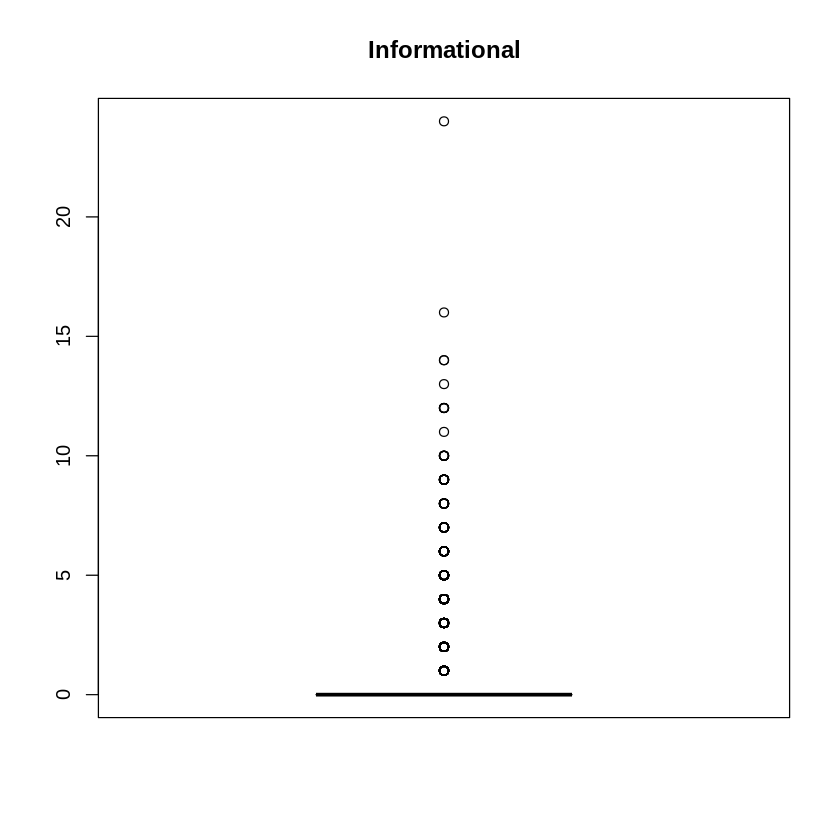

In [19]:
boxplot((engaged_shopers$`Informational`), col='green', main="Informational")

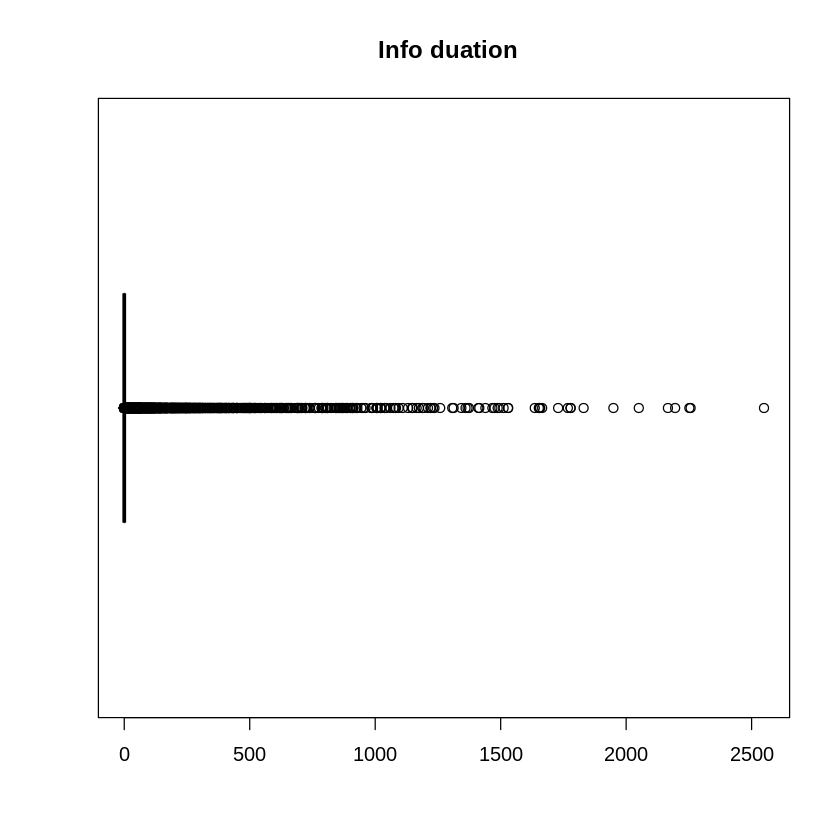

In [20]:

boxplot((engaged_shopers$`Informational_Duration`),horizontal=TRUE, col='blue', main=" Info duation")

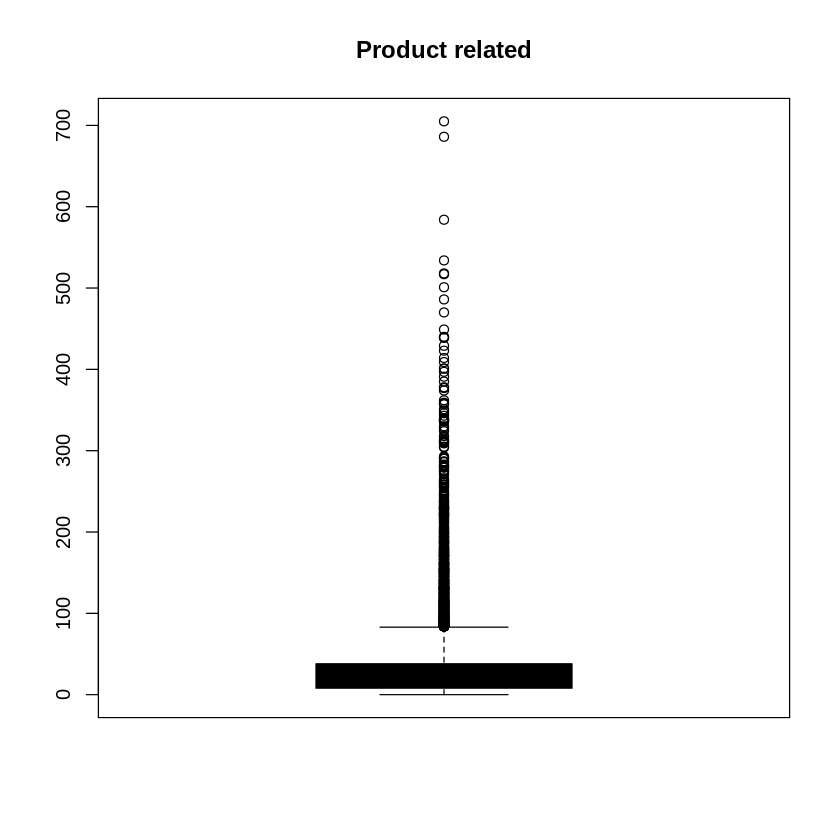

In [23]:
boxplot((engaged_shopers$`ProductRelated`),col='black', main="Product related")

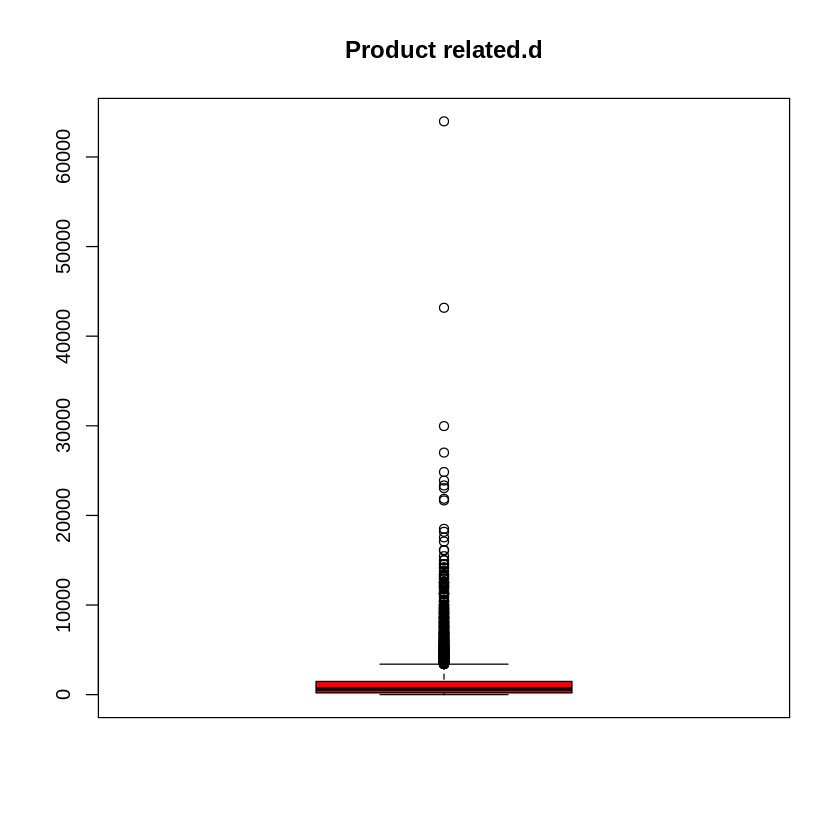

In [25]:
boxplot((engaged_shopers$`ProductRelated_Duration`),col='red', main="Product related.d")

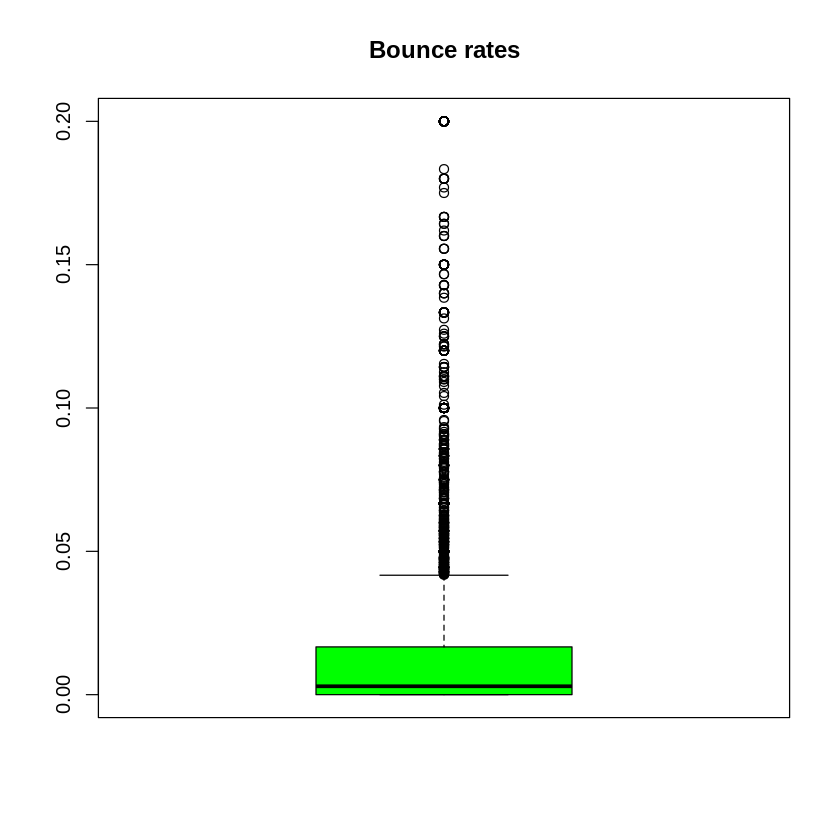

In [27]:

boxplot((engaged_shopers$`BounceRates`),col='green', main="Bounce rates")

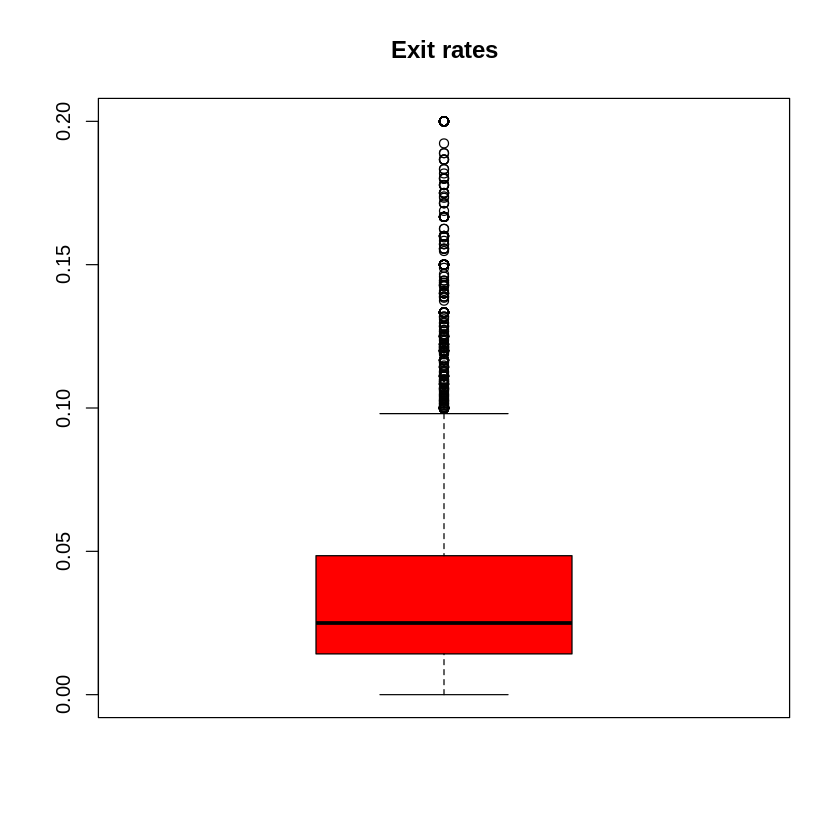

In [29]:

boxplot((engaged_shopers$`ExitRates`),col='red', main="Exit rates")

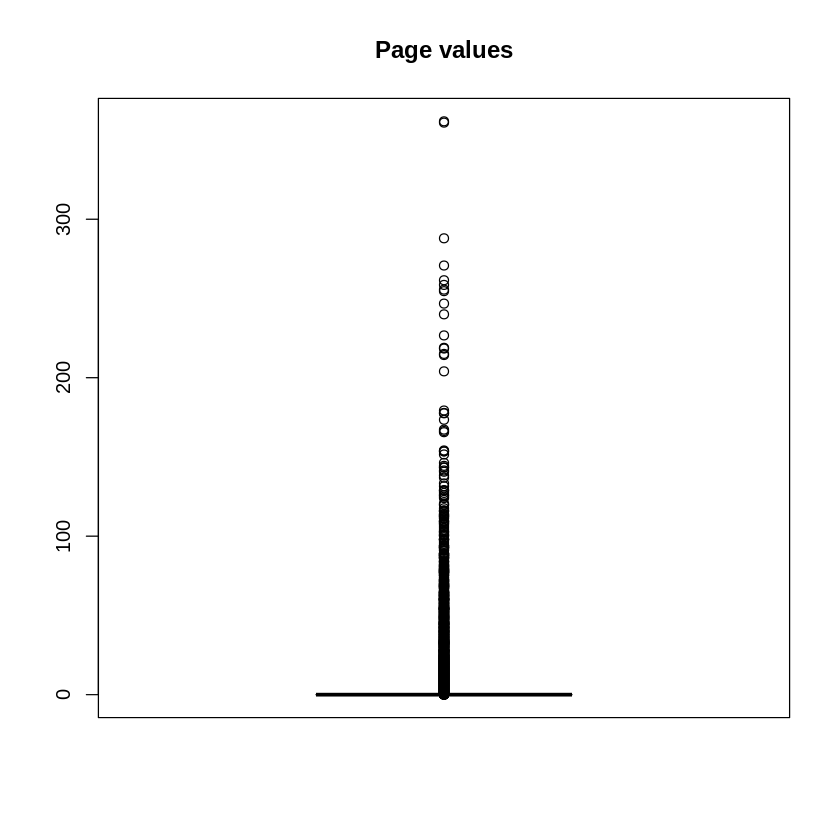

In [30]:

boxplot((engaged_shopers$PageValues),col='green', main="Page values")

# Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)

## Univariate Analysis

In [31]:
summary(engaged_shopers)

 Administrative  Administrative_Duration Informational    
 Min.   : 0.00   Min.   :  -1.00         Min.   : 0.0000  
 1st Qu.: 0.00   1st Qu.:   0.00         1st Qu.: 0.0000  
 Median : 1.00   Median :   9.00         Median : 0.0000  
 Mean   : 2.34   Mean   :  81.68         Mean   : 0.5088  
 3rd Qu.: 4.00   3rd Qu.:  94.75         3rd Qu.: 0.0000  
 Max.   :27.00   Max.   :3398.75         Max.   :24.0000  
                                                          
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  8.00   1st Qu.:  193.6        
 Median :   0.00        Median : 18.00   Median :  609.5        
 Mean   :  34.84        Mean   : 32.06   Mean   : 1207.5        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1477.6        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
                                                                
  Bounce

The above isa summary of the statistics of numerical variables 

In the cases where the variable is catergorical the summary of the count of unique entries have been  listed 

We can also see again that from the summary we can tell that some of the numerical columns are catergorical in anature

## Bivariate Analysis

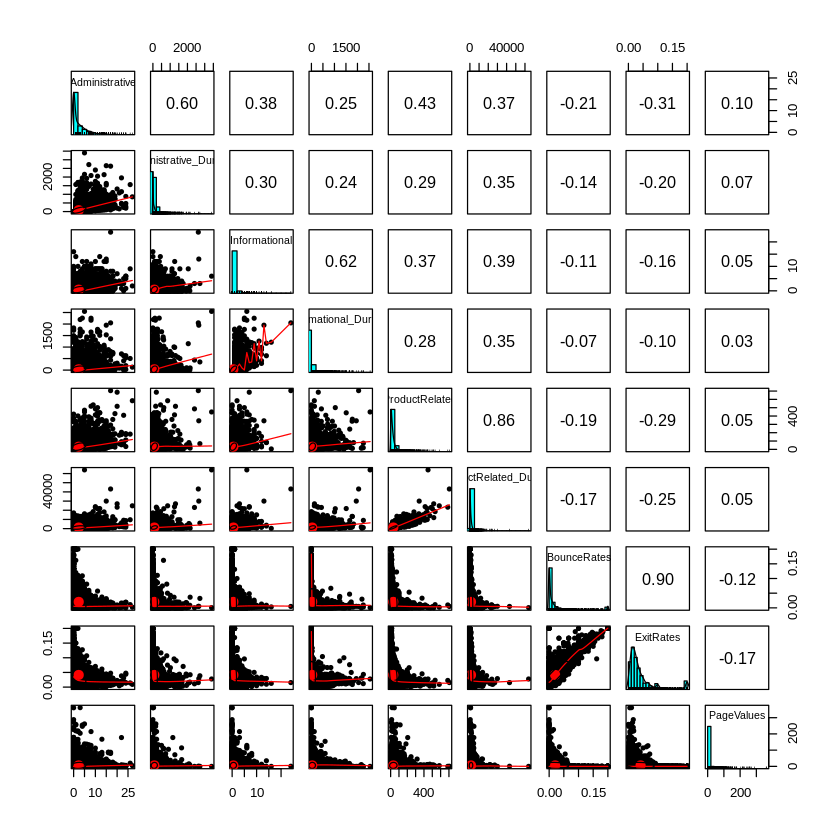

In [34]:
pairs.panels(engaged_shopers[,c(1:9)])

We can see strong relationships  with most being parabolic 

In [37]:
library(dplyr)
x <- round(cor(select_if(engaged_shopers, is.numeric)), 4)
res <- cor(x)
corr <- round(res,4)
print(corr)

                        Administrative Administrative_Duration Informational
Administrative                  1.0000                  0.8817        0.6620
Administrative_Duration         0.8817                  1.0000        0.5813
Informational                   0.6620                  0.5813        1.0000
Informational_Duration          0.5235                  0.4735        0.8828
ProductRelated                  0.7135                  0.5956        0.6521
ProductRelated_Duration         0.6947                  0.6183        0.6705
BounceRates                    -0.6841                 -0.5860       -0.5339
ExitRates                      -0.7358                 -0.6305       -0.5675
PageValues                      0.1552                  0.0996        0.0375
SpecialDay                     -0.3977                 -0.3767       -0.3355
OperatingSystems               -0.2505                 -0.2607       -0.2938
Browser                        -0.2535                 -0.2561       -0.3146

# Implement the Solution




## DBSCAN

In [51]:
# Making a copy of the dataframe incase something goes wrong

df<- engaged_shopers

In [52]:
head(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


Encoding the variables

In [53]:
df$SpecialDay <- as.numeric(as.factor(df$SpecialDay))
df$Month <- as.numeric(as.factor(df$Month))
df$OperatingSystems <- as.numeric(as.factor(df$OperatingSystems))
df$Browser <- as.numeric(as.factor(df$Browser))
df$Region <- as.numeric(as.factor(df$Region))
df$TrafficType <- as.numeric(as.factor(df$TrafficType))
df$VisitorType <- as.numeric(as.factor(df$VisitorType))
df$Weekend <- as.numeric(as.factor(df$Weekend))
df$Revenue <- as.numeric(as.factor(df$Revenue))
head(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,1,3,1,1,1,1,3,1,1
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,1,3,2,2,1,2,3,1,1
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,1,3,4,1,9,3,3,1,1
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,1,3,3,2,2,4,3,1,1
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,1,3,3,3,1,4,3,2,1
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,1,3,2,2,1,3,3,1,1


In [60]:
colnames(df)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

In [62]:
#  creting a df for DBSCAN
db_df <- df[, c(1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18)]

In [63]:
#fitting the model

db<-dbscan(db_df,eps=0.4,MinPts = 3)

Warning message in dbscan(db_df, eps = 0.4, MinPts = 3):
“converting argument MinPts (fpc) to minPts (dbscan)!”


In [64]:
# printing the model results
print(db)

DBSCAN clustering for 12199 objects.
Parameters: eps = 0.4, minPts = 3
The clustering contains 0 cluster(s) and 12199 noise points.

    0 
12199 

Available fields: cluster, eps, minPts


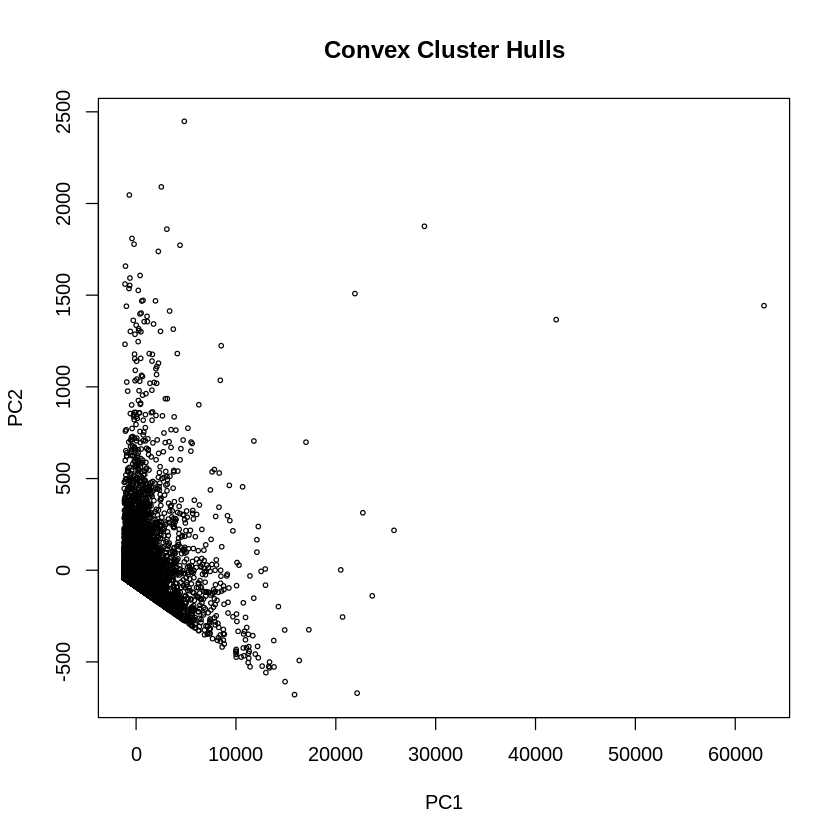

In [65]:
#Visualising the results

hullplot(db_df,db$cluster)

## Hierarchical Clustering

In [66]:
## scale our data since the variables are  on different scales

df_h<- scale(db_df)

In [69]:
colMeans(df_h)
apply(df_h, 2, sd)

Administrative Administrative_Duration           Informational 
          -4.042863e-17            4.587895e-17           -1.985369e-17 
 Informational_Duration          ProductRelated ProductRelated_Duration 
           2.650605e-17            6.470480e-17           -1.559630e-17 
            BounceRates               ExitRates              PageValues 
           1.407005e-17           -4.835579e-17           -1.170864e-17 
             SpecialDay                   Month        OperatingSystems 
           1.240457e-16            6.301032e-17            5.837340e-17 
                Browser                  Region             TrafficType 
          -1.291878e-16            5.251694e-17           -2.544166e-17 
            VisitorType                 Weekend                 Revenue 
           2.189821e-16           -1.873154e-16            1.594802e-16

Administrative Administrative_Duration           Informational 
                      1                       1                       1 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      1                       1                       1 
            BounceRates               ExitRates              PageValues 
                      1                       1                       1 
             SpecialDay                   Month        OperatingSystems 
                      1                       1                       1 
                Browser                  Region             TrafficType 
                      1                       1                       1 
            VisitorType                 Weekend                 Revenue 
                      1                       1                       1

We have a standard deviation of one hence our columns have been harmonised

In [70]:
head(df_h)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.6963635,-0.6289343,3.954699721,3.4273070,-0.3190356,-0.3103105,-1.333953,-1.2396607,-0.7939682,-0.8962939,-0.76562243,0.409771,-0.5528638,-0.4305688
2,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.6739424,-0.5955997,-0.450343788,1.2650121,-0.3190356,-0.3103105,-1.333953,-0.1371074,-0.2093703,-0.8962939,-0.51660683,0.409771,-0.5528638,-0.4305688
3,-0.7025315,-0.4657410,-0.3988128,-0.2533417,-0.6963635,-0.6294551,3.954699721,3.4273070,-0.3190356,-0.3103105,-1.333953,2.0679992,-0.7939682,2.4336556,-0.26759123,0.409771,-0.5528638,-0.4305688
4,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.6739424,-0.6275453,0.650917089,2.1299300,-0.3190356,-0.3103105,-1.333953,0.9654459,-0.2093703,-0.4800502,-0.01857564,0.409771,-0.5528638,-0.4305688
5,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.4945739,-0.3020990,-0.009839437,0.1838646,-0.3190356,-0.3103105,-1.333953,0.9654459,0.3752276,-0.8962939,-0.01857564,0.409771,1.8086156,-0.4305688
6,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.2927843,-0.5486101,-0.102577188,-0.3661929,-0.3190356,-0.3103105,-1.333953,-0.1371074,-0.2093703,-0.8962939,-0.26759123,0.409771,-0.5528638,-0.4305688


In [71]:
# calculatingthe distnces
distance <- dist(df_h, method = "euclidean")

In [72]:
# hierarchical clustering using the Ward's method

hc_cluster <- hclust(distance, method = "ward.D2" )

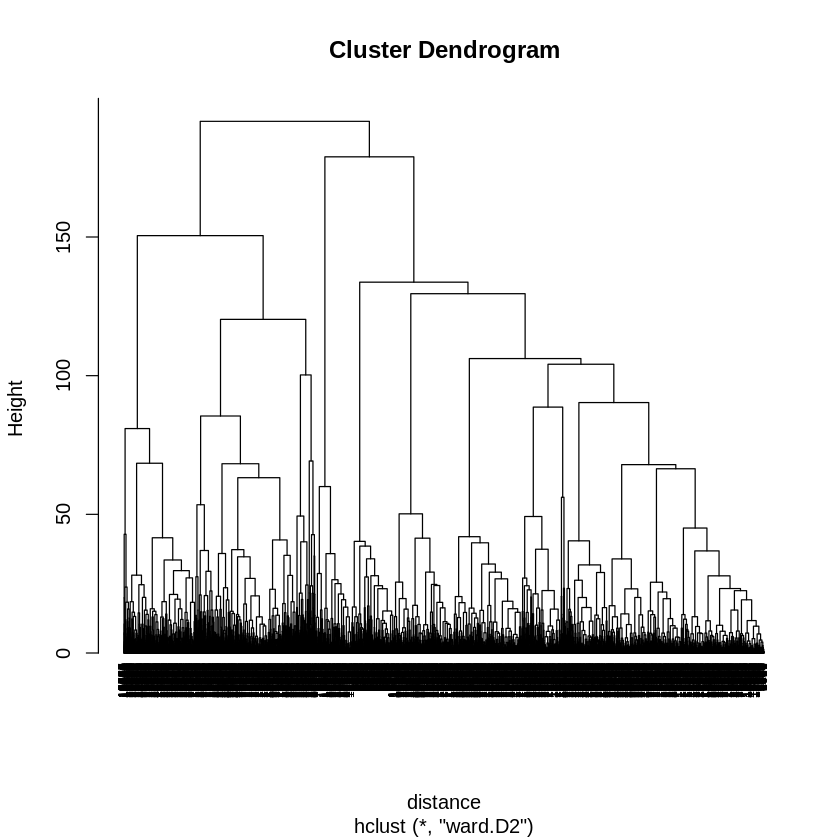

In [73]:
#  Visualising the dendogram

plot(hc_cluster, cex = 0.6, hang = -1)

Due to high number of variables in our dataset. The visualisation of the dendodram is unclear hence we can no see the way the datasets were clustered

# Challenge the Solution

## K-Mean Clustering

In [76]:
#Normalising our data
normalize <- function(x){
  return ((x-min(x)) / (max(x)-min(x)))
}

In [74]:
head(db_df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,1,3,1,1,1,1,3,1,1
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,1,3,2,2,1,2,3,1,1
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,1,3,4,1,9,3,3,1,1
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,1,3,3,2,2,4,3,1,1
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,1,3,3,3,1,4,3,2,1
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,1,3,2,2,1,3,3,1,1


In [78]:
db_df$Administrative<- normalize(db_df$Administrative)
db_df$Administrative_Duration<- normalize(db_df$Administrative_Duration)
db_df$Informational<- normalize(db_df$Informational)
db_df$Informational_Duration<- normalize(db_df$Informational_Duration)
db_df$ProductRelated<- normalize(db_df$ProductRelated)
db_df$ProductRelated_Duration<- normalize(db_df$ProductRelated_Duration)
db_df$BounceRates<- normalize(db_df$BounceRates)
db_df$ExitRates<- normalize(db_df$ExitRates)
db_df$PageValues<- normalize(db_df$PageValues)
db_df$SpecialDay<- normalize(db_df$SpecialDay)
db_df$Month<- normalize(db_df$Month)
db_df$OperatingSystems<- normalize(db_df$OperatingSystems)
db_df$Browser<- normalize(db_df$Browser)
db_df$Region<- normalize(db_df$Region)
db_df$TrafficType<- normalize(db_df$TrafficType)
db_df$VisitorType<- normalize(db_df$VisitorType)
db_df$Weekend<- normalize(db_df$Weekend)
db_df$Revenue<- normalize(db_df$Revenue)

In [79]:
head(db_df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.0002941393,0,0.0003920992,0.001418440,1.563122e-05,1.00000000,1.000000,0,0,0.2222222,0.0000000,0.00000000,0.000,0.00000000,1,0,0
2,0,0.0002941393,0,0.0003920992,0.002836879,1.016029e-03,0.00000000,0.500000,0,0,0.2222222,0.1428571,0.08333333,0.000,0.05263158,1,0,0
3,0,0.0000000000,0,0.0000000000,0.001418440,0.000000e+00,1.00000000,1.000000,0,0,0.2222222,0.4285714,0.00000000,1.000,0.10526316,1,0,0
4,0,0.0002941393,0,0.0003920992,0.002836879,5.731448e-05,0.25000000,0.700000,0,0,0.2222222,0.2857143,0.08333333,0.125,0.15789474,1,0,0
5,0,0.0002941393,0,0.0003920992,0.014184397,9.824223e-03,0.10000000,0.250000,0,0,0.2222222,0.2857143,0.16666667,0.000,0.15789474,1,1,0
6,0,0.0002941393,0,0.0003920992,0.026950355,2.426226e-03,0.07894737,0.122807,0,0,0.2222222,0.1428571,0.08333333,0.000,0.10526316,1,0,0


In [82]:
# Applying the K-means clustering algorithm with 4 centroids(k=4)
# Starting with a seed of 150
set.seed(150)
# Applying formula
k_means <- kmeans(db_df, centers = 3, nstart = 25)
print(k_means)

K-means clustering with 3 clusters of sizes 7934, 2357, 1908

Cluster means:
  Administrative Administrative_Duration Informational Informational_Duration
1     0.07767788              0.02164292    0.01786089             0.01164073
2     0.08534075              0.02433101    0.02308726             0.01493915
3     0.12568911              0.03543885    0.03275681             0.02298149
  ProductRelated ProductRelated_Duration BounceRates  ExitRates  PageValues
1     0.04054371              0.01678013  0.12094636 0.23482361 0.005637927
2     0.04351968              0.01753270  0.10129086 0.20426369 0.005173920
3     0.06838322              0.02934308  0.02558576 0.09777584 0.075365536
  SpecialDay     Month OperatingSystems   Browser    Region TrafficType
1 0.07096042 0.5622917        0.1610429 0.1149798 0.2715213   0.1628501
2 0.06313110 0.5747890        0.1628584 0.1006930 0.2684026   0.1606190
3 0.02316562 0.6231074        0.1561096 0.1211129 0.2602856   0.1590257
  VisitorType   Wee

In [83]:
k_means$centers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0.07767788,0.02164292,0.01786089,0.01164073,0.04054371,0.01678013,0.12094636,0.23482361,0.005637927,0.07096042,0.5622917,0.1610429,0.1149798,0.2715213,0.1628501,0.8832241,0.0000000,0
2,0.08534075,0.02433101,0.02308726,0.01493915,0.04351968,0.01753270,0.10129086,0.20426369,0.005173920,0.06313110,0.5747890,0.1628584,0.1006930,0.2684026,0.1606190,0.8400509,1.0000000,0
3,0.12568911,0.03543885,0.03275681,0.02298149,0.06838322,0.02934308,0.02558576,0.09777584,0.075365536,0.02316562,0.6231074,0.1561096,0.1211129,0.2602856,0.1590257,0.7746331,0.2615304,1


In [84]:
k_means$cluster

1     2     3     4     5     6     7     8     9    10    11    12    13 
    1     1     1     1     2     1     1     2     1     1     1     1     1 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
    1     1     1     1     2     1     1     2     1     1     1     2     1 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    1     1     1     1     1     2     1     1     1     1     2     1     1 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    1     1     1     1     1     1     1     1     1     1     1     2     1 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    2     1     1     1     1     1     1     1     1     1     1     2     1 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    3     1     1     1     1     1     1     1     1     1     1     3     1 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
    2     1     2     1     1     1     2     1     1     1     1     1     1 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
    2     1     1     1     1     1     1     1     1     1     3     1     1 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
    1     1     1     1     1     1     1     1     1     1     1     2     1 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
    2     1     1     1     1     1     1     1     1     1     1     1     1 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
    1     1     1     1     1     1     1     1     1     1     1     1     2 
  157   158   160   161   162   163   164   165   166   167   168   169   170 
    2     2     1     1     2     2     1     1     1     1     1     1     2 
  171   172   173   174   175   176   177   178   180   181   182   183   184 
    2     1     1     2     2     1     1     1     1     2     1     1     2 
  185   186   187   188   189   190   191   192   193   194   195   196   197 
    1     1     1     2     3     1     1     1     1     1     2     1     3 
  198   199   200   201   202   203   204   205   206   207   208   209   210 
    1     3     3     3     2     1     1     1     1     3     2     1     1 
  211   212   213   214   215   216   217   218   219   220   221   222   223 
    1     1     1     2     1     1     1     1     1     1     3     1     1 
  224   225   226   227   228   229   230   231   232   233   234   235   236 
    1     1     2     1     1     3     1     2     1     2     2     2     1 
  237   238   239   240   241   242   243   244   245   246   247   248   249 
    2     2     2     1     1     1     1     2     1     1     1     1     3 
  250   251   252   253   254   255   256   257   258   259   260   261   262 
    2     2     1     1     1     2     1     1     1     1     1     2     1 
  263   264   265   266   267   268   269   270   271   272   273   274   275 
    3     1     1     3     1     1     1     2     2     1     1     1     2 
  276   277   278   279   280   281   282   283   284   285   286   287   288 
    1     3     1     1     1     2     3     1     1     1     1     1     1 
  289   290   291   292   293   294   295   296   297   298   299   300   301 
    1     1     1     1     1     2     3     3     1     1     1     1     2 
  302   303   304   305   306   307   308   309   310   311   312   313   314 
    2     1     1     1     1     2     1     1     2     1     2     1     1 
  315   316   317   318   319   320   321   322   323   324   325   326   327 
    1     1     1     1     1     1     3     1     1     1     1     1     1 
  328   329   330   331   332   333   334   335   336 

## Finding Optimal K through Visualisation

In [86]:
install.packages("factoextra")
library("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘corrplot’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



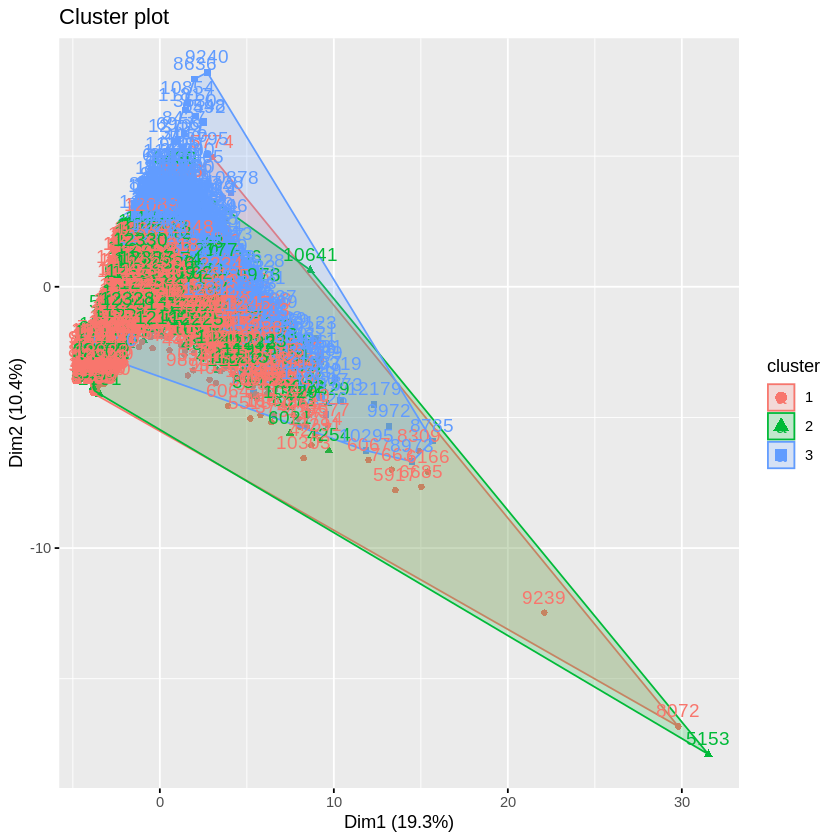

In [88]:
# Using fviz to show our clusters
fviz_cluster(k_means, data = db_df)

Clustering with three clusters

# Follow up Questions